In [9]:
import sklearn  
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np
import missingno as msno
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_text
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import matthews_corrcoef
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
import joblib


import warnings
warnings.filterwarnings('ignore')

In [3]:
dataset = pd.read_csv('S4_diabetes_desequilibrio_clases.csv')
dataset.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


### train

In [4]:
X = dataset.iloc[:,1:] # obrati paznju - atributi
y = dataset["Diabetes_binary"] # izlaz

test_size = 0.3  # percentage of the input data that I will use to validate the model
random_state=42
# Divide the data into training, validation and test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state,
                                                    shuffle=True)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=test_size, random_state=random_state,
                                                    shuffle=True)

In [10]:
#treniranje
model = LogisticRegression(random_state=42) #prediktor,klasifikator
model.fit(X_train, y_train) #za ovaj ulaz x hocu ovaj izlaz y

y_pred_logreg = model.predict(X_test) #trazim izlaz y za nepoznate x test
acc_lg =  accuracy_score(y_test, y_pred_logreg)

In [7]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_pred, y_test)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap=sns.cubehelix_palette(as_cmap=True), cbar=False)
    plt.title(f"Confusion Matrix - {model_name}")
    plt.ylabel('Predicted Label')
    plt.xlabel('Actual Label')
    plt.show()

Logistic Regression Accuracy:  0.8633974561126879
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.93     65605
         1.0       0.52      0.14      0.22     10499

    accuracy                           0.86     76104
   macro avg       0.70      0.56      0.57     76104
weighted avg       0.83      0.86      0.83     76104

[[64227  1378]
 [ 9018  1481]]


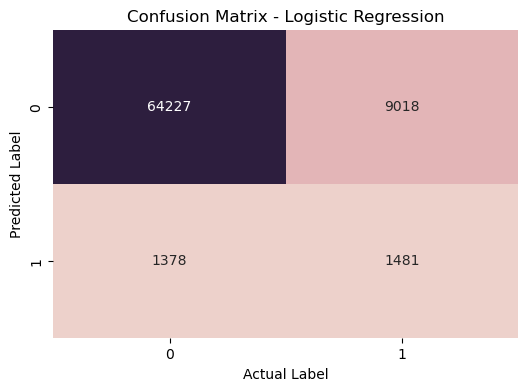

In [8]:
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred_logreg)) # y_test ground truth
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))
plot_confusion_matrix(y_test, y_pred_logreg, "Logistic Regression")

In [11]:
joblib.dump(model, 'model.joblib')

['model.joblib']